### 데이터셋 받기

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### CIFAR-10 데이터 그리기

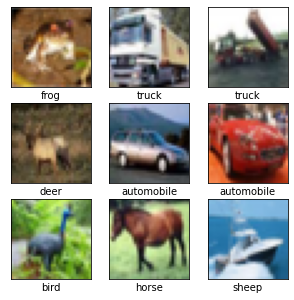

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','sheep','truck']

ls=np.random.randint(60000,size=9)

plt.figure(figsize=(5,5))

for i,idx in enumerate(ls):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(class_names[int(y_train[i])])
    
plt.show()

### CIFAR-10 데이터셋 전처리

In [ ]:
#채널별로 평균과 표준편차를 구함.
x_mean=np.mean(x_train,axis=(0,1,2))
x_std=np.std(x_train,axis=(0,1,2))

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

print(x_train.shape,len(y_train))
print(x_val.shape,len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


### CIFAR-10 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

### 모델 학습하기

In [ ]:
history=model.fit(x_train,y_train,
                  epochs=30,
                  batch_size=32,
                 validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 11s 7ms/step - loss: 1.6633 - acc: 0.4191 - val_loss: 1.3975 - val_acc: 0.5013
Epoch 2/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2396 - acc: 0.5644 - val_loss: 1.1766 - val_acc: 0.5894
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0417 - acc: 0.6367 - val_loss: 1.0762 - val_acc: 0.6253
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.8971 - acc: 0.6904 - val_loss: 0.9984 - val_acc: 0.6494
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.7697 - acc: 0.7316 - val_loss: 1.0079 - val_acc: 0.6535
Epoch 6/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.6488 - acc: 0.7766 - val_loss: 1.1191 - val_acc: 0.6411
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5380 - acc: 0.8146 - val_loss: 1.0516 - val_acc: 0.6675
Epoch 8/30
1094/1094 [==============================] - 6s 6m

### CIFAR-10 학습과정 그려보기

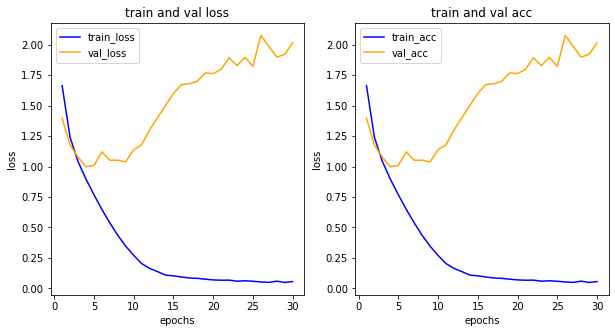

In [ ]:
his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_acc')
ax2.plot(epochs,val_loss,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### 신경망 시각화 해보기

1/1 [==============================] - 0s 222ms/step


<ipython-input-7-9e69329eb5e7>:20: RuntimeWarning: invalid value encountered in true_divide
  x-=x.mean();x/=x.std()


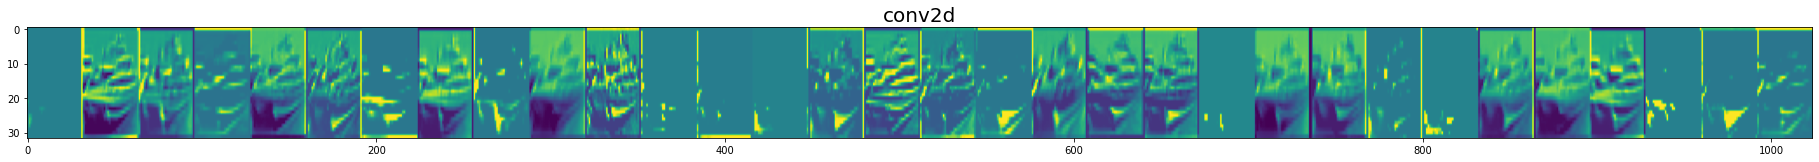

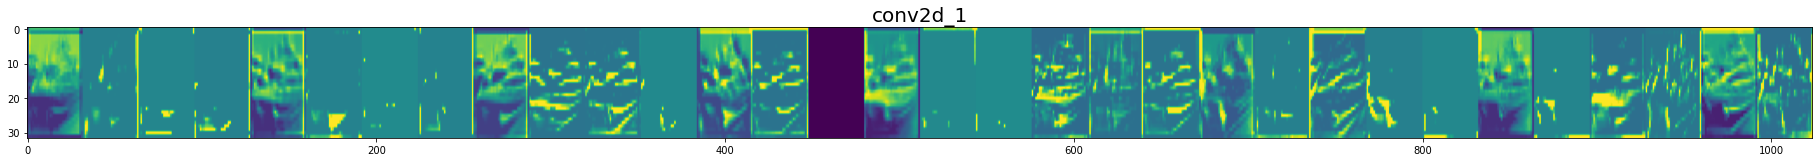

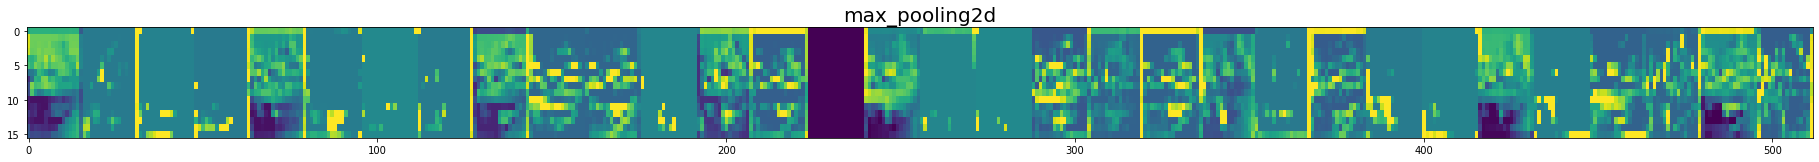

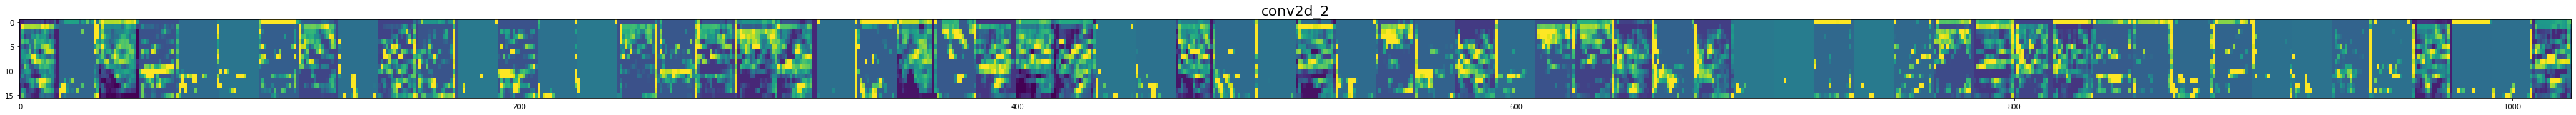

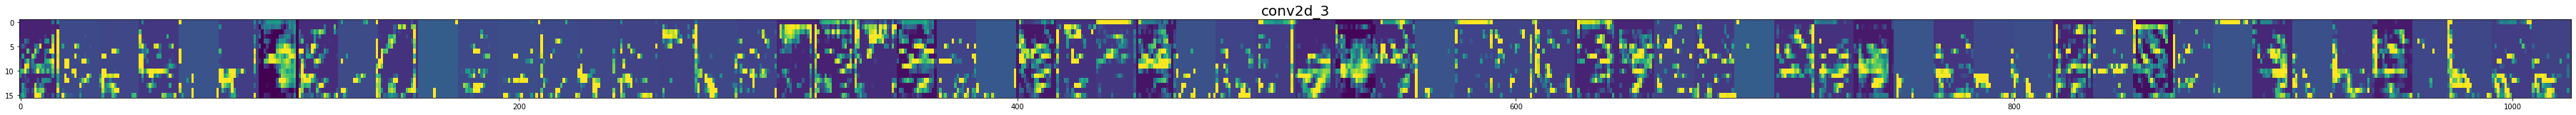

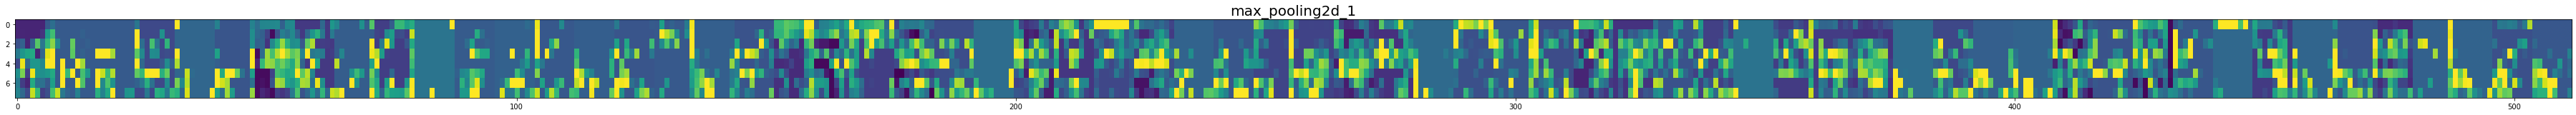

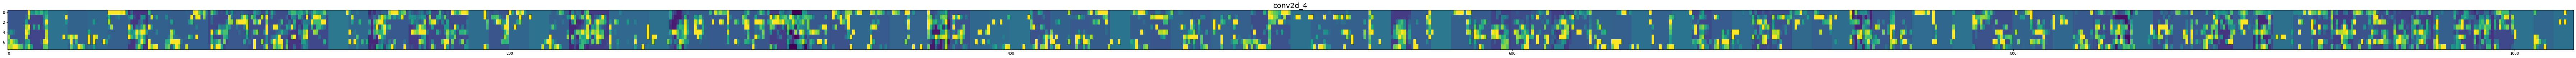

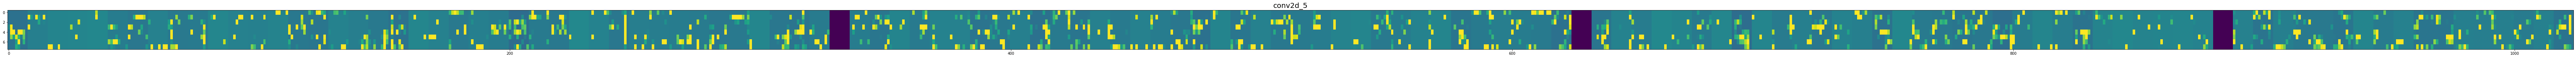

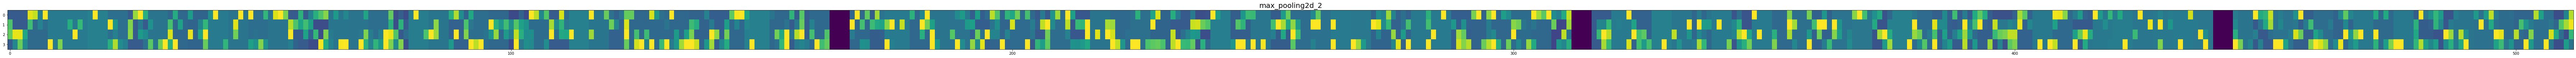

In [ ]:
import tensorflow as tf

get_layer_name=[layer.name for layer in model.layers]
get_output=[layer.output for layer in model.layers]

visual_model=tf.keras.models.Model(inputs=model.input,outputs=get_output)

test_img=np.expand_dims(x_test[1],axis=0)
feature_maps=visual_model.predict(test_img)

for layer_name,feature_map in zip(get_layer_name,feature_maps):
    if(len(feature_map.shape)==4):
        img_size=feature_map.shape[1]
        features=feature_map.shape[-1]
        
        display_grid=np.zeros((img_size, img_size*features))
        
        for i in range(features):
          x=feature_map[0,:,:,i]
          x-=x.mean();x/=x.std()
          x*=64;x+=128
          x=np.clip(x,0,255).astype('uint8')
          display_grid[:,i*img_size:(i+1)*img_size]=x
        
        plt.figure(figsize=(features,2+1./features))
        plt.title(layer_name,fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid,aspect='auto',cmap='viridis')

# 과대적합을 피하는 4가지 방법
1. 규제화 함수 사용
2. 드롭아웃
3. 배치정규화
4. 데이터 증식 사용하기

### -규제화 함수 사용  
임의로 모델의 복잡도를 제한

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 2.2972 - acc: 0.4054 - val_loss: 1.9791 - val_acc: 0.4849
Epoch 2/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.8055 - acc: 0.5452 - val_loss: 1.7491 - val_acc: 0.5585
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.5767 - acc: 0.6139 - val_loss: 1.5589 - val_acc: 0.6195
Epoch 4/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.3844 - acc: 0.6761 - val_loss: 1.4660 - val_acc: 0.6390
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2248 - acc: 0.7246 - val_loss: 1.4250 - val_acc: 0.6543
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0762 - acc: 0.7698 - val_loss: 1.3572 - val_acc: 0.6751
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9518 - acc: 0.8098 - val_loss: 1.3405 - val_acc: 0.6828
Epoch 8/30
1094/1094 [==============================] - 6s 6ms

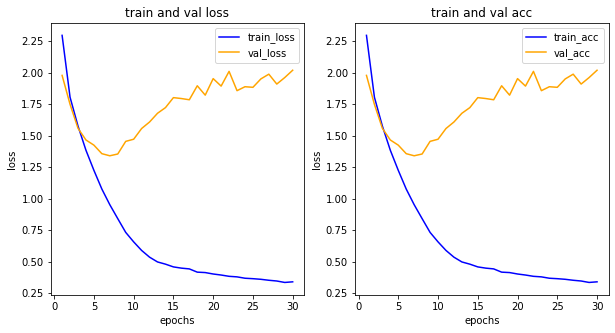

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history=model.fit(x_train,y_train,
                  epochs=30,
                  batch_size=32,
                 validation_data=(x_val,y_val))

his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_acc')
ax2.plot(epochs,val_loss,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### -드롭아웃  
학습이 진행되는 동안 일부 노드 제외(일반적으로 0.2~0.5사용)

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 2.2323 - acc: 0.2698 - val_loss: 1.6889 - val_acc: 0.3863
Epoch 2/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.5585 - acc: 0.4255 - val_loss: 1.4675 - val_acc: 0.4679
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.3841 - acc: 0.4987 - val_loss: 1.3208 - val_acc: 0.5277
Epoch 4/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2487 - acc: 0.5525 - val_loss: 1.1549 - val_acc: 0.5939
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1371 - acc: 0.5937 - val_loss: 1.0820 - val_acc: 0.6169
Epoch 6/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0485 - acc: 0.6261 - val_loss: 0.9995 - val_acc: 0.6549
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9690 - acc: 0.6548 - val_loss: 0.9306 - val_acc: 0.6813
Epoch 8/30
1094/1094 [==============================] - 6s 6ms

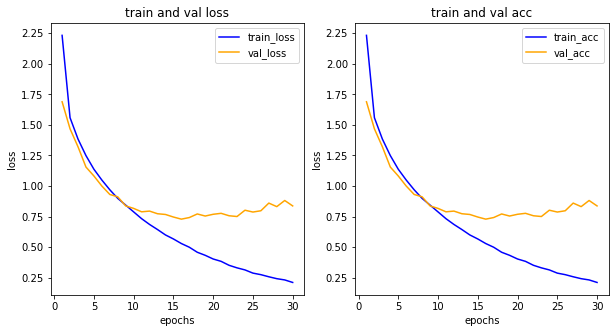

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history=model.fit(x_train,y_train,
                  epochs=30,
                  batch_size=32,
                 validation_data=(x_val,y_val))

his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_acc')
ax2.plot(epochs,val_loss,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### -배치 정규화  
배치정규화가 자체가 과대적합을 피하기위해 고안되지는 않았지만 자체적인 규제 효과가 있기 때문에 과대적합 문제를 피할 수 있게함.←항상 보장하는 것은 아님. 

Epoch 1/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.4556 - acc: 0.4823 - val_loss: 1.2506 - val_acc: 0.5505
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.0687 - acc: 0.6218 - val_loss: 1.0960 - val_acc: 0.6136
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8714 - acc: 0.6920 - val_loss: 1.0028 - val_acc: 0.6467
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7274 - acc: 0.7470 - val_loss: 0.9455 - val_acc: 0.6774
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6046 - acc: 0.7915 - val_loss: 0.9726 - val_acc: 0.6679
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.4960 - acc: 0.8322 - val_loss: 0.9102 - val_acc: 0.6908
Epoch 7/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.4019 - acc: 0.8679 - val_loss: 0.9404 - val_acc: 0.6873
Epoch 8/30
1094/1094 [==============================] - 7s 6ms

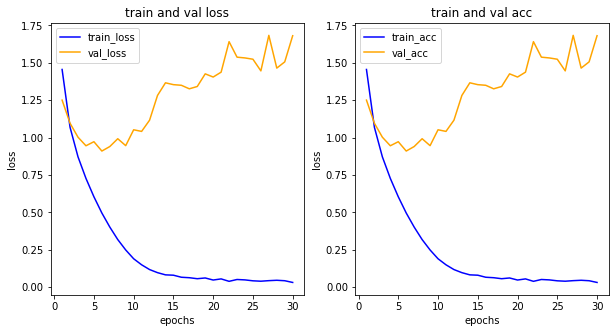

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history=model.fit(x_train,y_train,
                  epochs=30,
                  batch_size=32,
                 validation_data=(x_val,y_val))

his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_acc')
ax2.plot(epochs,val_loss,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### -데이터증진


Epoch 1/100
1094/1094 [==============================] - 20s 18ms/step - loss: 1.8689 - acc: 0.1014 - val_loss: 1.5494 - val_acc: 0.1226
Epoch 2/100
1094/1094 [==============================] - 19s 18ms/step - loss: 1.5083 - acc: 0.1007 - val_loss: 1.3583 - val_acc: 0.0555
Epoch 3/100
1094/1094 [==============================] - 20s 18ms/step - loss: 1.3970 - acc: 0.1014 - val_loss: 1.2440 - val_acc: 0.1354
Epoch 4/100
1094/1094 [==============================] - 20s 18ms/step - loss: 1.3086 - acc: 0.0990 - val_loss: 1.1571 - val_acc: 0.1187
Epoch 5/100
1094/1094 [==============================] - 20s 18ms/step - loss: 1.2390 - acc: 0.1009 - val_loss: 1.0899 - val_acc: 0.0727
Epoch 6/100
1094/1094 [==============================] - 19s 18ms/step - loss: 1.1891 - acc: 0.1015 - val_loss: 1.0958 - val_acc: 0.0718
Epoch 7/100
1094/1094 [==============================] - 19s 18ms/step - loss: 1.1325 - acc: 0.1004 - val_loss: 1.1586 - val_acc: 0.0731
Epoch 8/100
1094/1094 [==================

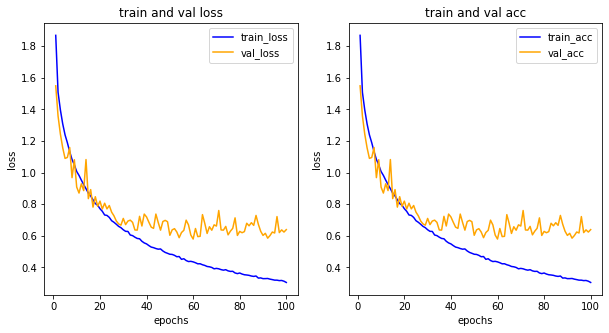

In [ ]:
from sklearn.utils import validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(horizontal_flip=True,
                                 zoom_range=0.2,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 rotation_range=30,
                                 fill_mode='nearest')

val_datagen=ImageDataGenerator()

batch_size=32

train_generator=train_datagen.flow(x_train,y_train,batch_size=batch_size)

val_generator=val_datagen.flow(x_val,y_val,batch_size=batch_size)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

def get_step(train_len,batch_size):
  if(train_len%batch_size>0):
    return train_len//batch_size+1
  else:
    return train_len//batch_size

history=model.fit(train_generator,
                  epochs=100,
                  steps_per_epoch=get_step(len(x_train),batch_size),
                  validation_data=val_generator,
                  validation_steps=get_step(len(x_val),batch_size))

his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_acc')
ax2.plot(epochs,val_loss,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()